In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder

### Load the dataset
The dataset which is going to be used here is a fake card transaction dataset generated by "https://generatedata.com/generator"

In [2]:
dataset = pd.read_csv('transaction_dataset.csv')

In [4]:
dataset.index = dataset['id']
dataset.drop(['id'], axis=1, inplace=True)

### Prepare the dataset

In [5]:
dataset.head()

,card_holder_name,timestamp,card_number,payment_amount,merchant_name
id,,,,,
1,Galvin Stark,"Jun 25, 2022 17:49",374668534431814,36,Adobe
2,Brenda Fowler,"Aug 25, 2021 22:55",448561 8637256467,32,Yahoo
3,Paloma Matthews,"Mar 7, 2023 08:26",5429 3525 6626 4856,70,Yahoo
4,Keane Reeves,"Nov 28, 2022 12:39",630484 62 8671 3264 177,67,Yahoo
5,Griffin Pruitt,"Mar 15, 2021 12:20",6494227746827566,20,Adobe


In [6]:
dataset['month'] = pd.to_datetime(dataset['timestamp']).dt.strftime('%Y-%m')

In [7]:
dataset.head()

,card_holder_name,timestamp,card_number,payment_amount,merchant_name,month
id,,,,,,
1,Galvin Stark,"Jun 25, 2022 17:49",374668534431814,36,Adobe,2022-06
2,Brenda Fowler,"Aug 25, 2021 22:55",448561 8637256467,32,Yahoo,2021-08
3,Paloma Matthews,"Mar 7, 2023 08:26",5429 3525 6626 4856,70,Yahoo,2023-03
4,Keane Reeves,"Nov 28, 2022 12:39",630484 62 8671 3264 177,67,Yahoo,2022-11
5,Griffin Pruitt,"Mar 15, 2021 12:20",6494227746827566,20,Adobe,2021-03


In [8]:
grouped_dataset = dataset.groupby(['month', 'merchant_name'])['payment_amount'].sum().reset_index()

In [9]:
adobe_dataset = grouped_dataset[grouped_dataset['merchant_name'] == 'Adobe']
adobe_dataset.index = adobe_dataset['month']
adobe_dataset = adobe_dataset.drop(['merchant_name'], axis=1)
adobe_dataset.tail()

,month,payment_amount
month,,
2023-07,2023-07,297
2023-08,2023-08,439
2023-09,2023-09,207
2023-10,2023-10,355
2023-11,2023-11,76


#### Setup forecast dataset

In [10]:
forecast_ds = pd.DataFrame({
    'month': ['2023-12', '2024-01', '2024-02', '2024-03']
})
forecast_ds.index = forecast_ds['month']
forecast_ds.head()

,month
month,
2023-12,2023-12
2024-01,2024-01
2024-02,2024-02
2024-03,2024-03


### Encode dataset

In [11]:
forecast_months = forecast_ds['month']
given_months = adobe_dataset['month']

month_list = pd.concat([given_months, forecast_months], ignore_index=True)
month_list.tail()

36    2023-11
37    2023-12
38    2024-01
39    2024-02
40    2024-03
Name: month, dtype: object

In [12]:
month_encoder = LabelEncoder()

month_encoder.fit(month_list)

encoded_adobe_dataset = pd.DataFrame(adobe_dataset)
encoded_adobe_dataset['month'] = month_encoder.transform(adobe_dataset['month'])

encoded_forecast_dataset = pd.DataFrame(forecast_ds)
encoded_forecast_dataset['month'] = month_encoder.transform(forecast_ds['month'])

In [13]:
encoded_adobe_dataset.head()

,month,payment_amount
month,,
2020-11,0,467
2020-12,1,267
2021-01,2,415
2021-02,3,419
2021-03,4,20


### Extract independent (X) and dependent (y) variables into seperate dataframes 

In [14]:
X = encoded_adobe_dataset['month']
y = encoded_adobe_dataset['payment_amount']

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

### Visualize

Text(0, 0.5, 'Total Transaction Amounts Per Month')

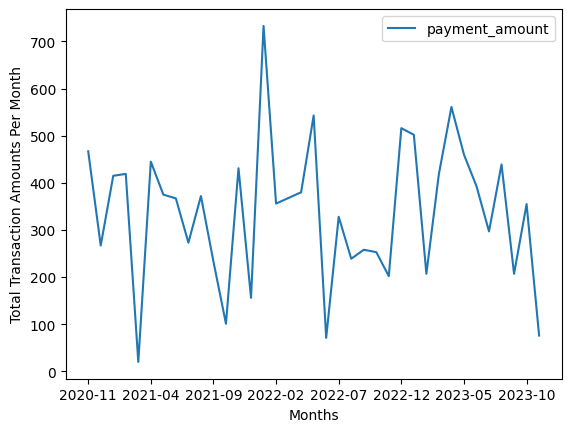

In [17]:
adobe_dataset.plot()
plt.xlabel('Months')
plt.ylabel('Total Transaction Amounts Per Month')


## Create the neural network

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.fit(X, y, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
19/19 - 2s - loss: 135523.9688 - 2s/epoch - 112ms/step
Epoch 2/400
19/19 - 0s - loss: 135184.2656 - 96ms/epoch - 5ms/step
Epoch 3/400
19/19 - 0s - loss: 134827.4688 - 106ms/epoch - 6ms/step
Epoch 4/400
19/19 - 0s - loss: 134413.3438 - 110ms/epoch - 6ms/step
Epoch 5/400
19/19 - 0s - loss: 133964.1719 - 115ms/epoch - 6ms/step
Epoch 6/400
19/19 - 0s - loss: 133431.4531 - 103ms/epoch - 5ms/step
Epoch 7/400
19/19 - 0s - loss: 132825.9375 - 104ms/epoch - 5ms/step
Epoch 8/400
19/19 - 0s - loss: 132093.2031 - 96ms/epoch - 5ms/step
Epoch 9/400
19/19 - 0s - loss: 131238.7188 - 92ms/epoch - 5ms/step
Epoch 10/400
19/19 - 0s - loss: 130222.9297 - 115ms/epoch - 6ms/step
Epoch 11/400
19/19 - 0s - loss: 129057.4297 - 90ms/epoch - 5ms/step
Epoch 12/400
19/19 - 0s - loss: 127764.1250 - 107ms/epoch - 6ms/step
Epoch 13/400
19/19 - 0s - loss: 126231.4844 - 68ms/epoch - 4ms/step
Epoch 14/400
19/19 - 0s - loss: 124583.6641 - 111ms/epoch - 6ms/step
Epoch 15/400
19/19 - 0s - loss: 122705.6094 - 120

In [20]:
encoded_forecast_dataset['month']

month
2023-12    37
2024-01    38
2024-02    39
2024-03    40
Name: month, dtype: int32

In [21]:
forecast = model.predict(encoded_forecast_dataset['month'])

1/1 [==============================] - 0s 180ms/step


In [22]:
forecast_results = pd.DataFrame(encoded_forecast_dataset)
forecast_results['payment_amount'] = forecast
forecast_results['month'] = month_encoder.inverse_transform(forecast_results['month'])
forecast_results.index = forecast_results['month']

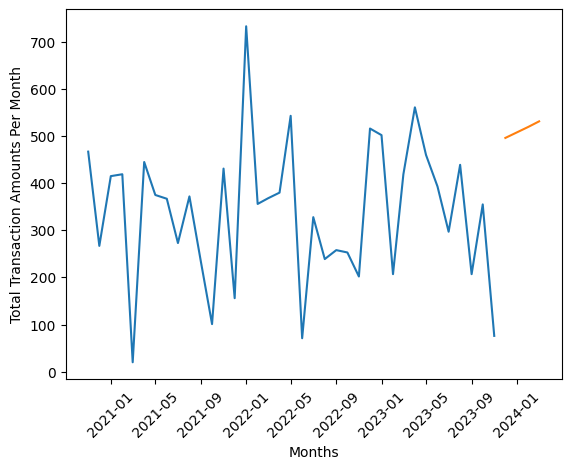

In [23]:
adobe_dataset['month_value'] = pd.to_datetime(adobe_dataset['month'], format='%Y-%m')
forecast_results['month_value'] = pd.to_datetime(forecast_results['month'], format='%Y-%m')

plt.plot(adobe_dataset['month_value'], adobe_dataset['payment_amount'])
plt.plot(forecast_results['month_value'], forecast_results['payment_amount'])
plt.tick_params(axis='x', labelrotation=45)

plt.xlabel('Months')
plt.ylabel('Total Transaction Amounts Per Month')

plt.show()